# IPL Batsman Analysis

We are trying to identify some KPI's which decide the performance of teams and players in IPL History.

We have data of every delivery made and data in terms of matches which took place until the year 2017.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# reading the dataset
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

## Summarising the Data

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
# shape of the data
print(matches.shape)
print(deliveries.shape)

(636, 18)
(150460, 21)


In [6]:
matches.info

<bound method DataFrame.info of       id  season       city        date                        team1  \
0      1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1      2    2017       Pune  2017-04-06               Mumbai Indians   
2      3    2017     Rajkot  2017-04-07                Gujarat Lions   
3      4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4      5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   
..   ...     ...        ...         ...                          ...   
631  632    2016     Raipur  2016-05-22             Delhi Daredevils   
632  633    2016  Bangalore  2016-05-24                Gujarat Lions   
633  634    2016      Delhi  2016-05-25          Sunrisers Hyderabad   
634  635    2016      Delhi  2016-05-27                Gujarat Lions   
635  636    2016  Bangalore  2016-05-29          Sunrisers Hyderabad   

                           team2                  toss_winner toss_decision  \
0    Royal Challengers B

In [7]:
deliveries.info

<bound method DataFrame.info of         match_id  inning                 batting_team  \
0              1       1          Sunrisers Hyderabad   
1              1       1          Sunrisers Hyderabad   
2              1       1          Sunrisers Hyderabad   
3              1       1          Sunrisers Hyderabad   
4              1       1          Sunrisers Hyderabad   
...          ...     ...                          ...   
150455       636       2  Royal Challengers Bangalore   
150456       636       2  Royal Challengers Bangalore   
150457       636       2  Royal Challengers Bangalore   
150458       636       2  Royal Challengers Bangalore   
150459       636       2  Royal Challengers Bangalore   

                       bowling_team  over  ball        batsman    non_striker  \
0       Royal Challengers Bangalore     1     1      DA Warner       S Dhawan   
1       Royal Challengers Bangalore     1     2      DA Warner       S Dhawan   
2       Royal Challengers Bangalore     

In [8]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [9]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000
mean,318.281317,1.482188,10.142649,3.616483,0.000538,0.037498,0.004885,0.022232,0.004340,0.000066,1.222445,0.069022,1.291466
std,182.955531,0.501768,5.674338,1.807698,0.023196,0.257398,0.114234,0.200104,0.072652,0.018229,1.594509,0.349667,1.583240
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,319.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,476.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


## Answering Questions

1. Display all the matched played in a particular city

In [10]:
# creating a function
def get_matches_city(dataframe, city):
    mask = dataframe['city'] == city
    return dataframe[mask]

In [11]:
# all the matched played in Mumbai
get_matches_city(matches, "Mumbai")

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
15,16,2017,Mumbai,2017-04-16,Gujarat Lions,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,N Rana,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
23,24,2017,Mumbai,2017-04-22,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,14,0,MJ McClenaghan,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
27,28,2017,Mumbai,2017-04-24,Rising Pune Supergiant,Mumbai Indians,Mumbai Indians,field,normal,0,Rising Pune Supergiant,3,0,BA Stokes,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,573,2015,Mumbai,2015-05-19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,25,0,KA Pollard,Wankhede Stadium,HDPK Dharmasena,RK Illingworth,NaN
576,577,2016,Mumbai,2016-04-09,Mumbai Indians,Rising Pune Supergiants,Mumbai Indians,bat,normal,0,Rising Pune Supergiants,0,9,AM Rahane,Wankhede Stadium,HDPK Dharmasena,CK Nandan,NaN
584,585,2016,Mumbai,2016-04-16,Mumbai Indians,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,3,AJ Finch,Wankhede Stadium,HDPK Dharmasena,VK Sharma,NaN
589,590,2016,Mumbai,2016-04-20,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,RG Sharma,Wankhede Stadium,AK Chaudhary,CK Nandan,NaN


In [12]:
# all the matched played in Kolkata
get_matches_city(matches, "Kolkata")

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
10,11,2017,Kolkata,2017-04-13,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
22,23,2017,Kolkata,2017-04-21,Kolkata Knight Riders,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,4,SK Raina,Eden Gardens,CB Gaffaney,Nitin Menon,NaN
26,27,2017,Kolkata,2017-04-23,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,82,0,NM Coulter-Nile,Eden Gardens,CB Gaffaney,CK Nandan,NaN
30,31,2017,Kolkata,2017-04-28,Delhi Daredevils,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,7,G Gambhir,Eden Gardens,NJ Llong,S Ravi,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,608,2016,Kolkata,2016-05-04,Kolkata Knight Riders,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kolkata Knight Riders,7,0,AD Russell,Eden Gardens,AK Chaudhary,HDPK Dharmasena,NaN
613,614,2016,Kolkata,2016-05-08,Kolkata Knight Riders,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,5,P Kumar,Eden Gardens,M Erasmus,RJ Tucker,NaN
620,621,2016,Kolkata,2016-05-14,Rising Pune Supergiants,Kolkata Knight Riders,Rising Pune Supergiants,bat,normal,1,Kolkata Knight Riders,0,8,YK Pathan,Eden Gardens,A Nand Kishore,BNJ Oxenford,NaN
623,624,2016,Kolkata,2016-05-16,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,9,V Kohli,Eden Gardens,CB Gaffaney,A Nand Kishore,NaN


2. All matched played in a City in a given year

In [13]:
# we have to create multiple masks for this purpose
def get_matches_city_date(dataframe, city, date):
    # create a boolean array for all the matched in the given array
    masky = []
    for i in matches['date']:
        if i.split('-')[0] == date:
            masky.append(True)
        else:
            masky.append(False)
    masky = np.array(masky)

    mask1 = dataframe['city'] == city
    mask2 = masky       # use the boolean array from earlier as mask
    return dataframe[mask1 & mask2]

In [14]:
# All the matches played in Banglore in the year 2010
get_matches_city_date(matches, "Bangalore", '2010')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
180,181,2010,Bangalore,2010-03-16,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,bat,normal,0,Royal Challengers Bangalore,0,8,JH Kallis,M Chinnaswamy Stadium,S Das,DJ Harper,NaN
183,184,2010,Bangalore,2010-03-18,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper,NaN
191,192,2010,Bangalore,2010-03-23,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,normal,0,Royal Challengers Bangalore,36,0,RV Uthappa,M Chinnaswamy Stadium,RE Koertzen,RB Tiffin,NaN
196,197,2010,Bangalore,2010-03-25,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Delhi Daredevils,17,0,KM Jadhav,M Chinnaswamy Stadium,BG Jerling,RE Koertzen,NaN
213,214,2010,Bangalore,2010-04-08,Royal Challengers Bangalore,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,7,TL Suman,M Chinnaswamy Stadium,S Asnani,DJ Harper,NaN
216,217,2010,Bangalore,2010-04-10,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,R Vinay Kumar,M Chinnaswamy Stadium,K Hariharan,DJ Harper,NaN
225,226,2010,Bangalore,2010-04-17,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Mumbai Indians,57,0,R McLaren,M Chinnaswamy Stadium,HDPK Dharmasena,SJA Taufel,NaN


In [15]:
# get all the matched from Delhi in the year 2017
get_matches_city_date(matches, "Delhi", '2016')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
582,583,2016,Delhi,2016-04-15,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,8,A Mishra,Feroz Shah Kotla,S Ravi,C Shamshuddin,NaN
592,593,2016,Delhi,2016-04-23,Delhi Daredevils,Mumbai Indians,Mumbai Indians,field,normal,0,Delhi Daredevils,10,0,SV Samson,Feroz Shah Kotla,S Ravi,C Shamshuddin,NaN
598,599,2016,Delhi,2016-04-27,Gujarat Lions,Delhi Daredevils,Delhi Daredevils,field,normal,0,Gujarat Lions,1,0,CH Morris,Feroz Shah Kotla,M Erasmus,S Ravi,NaN
601,602,2016,Delhi,2016-04-30,Delhi Daredevils,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Delhi Daredevils,27,0,CR Brathwaite,Feroz Shah Kotla,KN Ananthapadmanabhan,M Erasmus,NaN
608,609,2016,Delhi,2016-05-05,Delhi Daredevils,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,AM Rahane,Feroz Shah Kotla,C Shamshuddin,RJ Tucker,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


3. Rank the Home Teams based in the Number of Matches won

In [16]:
# These are just the matches WON by the Home Teams
matches['winner'].value_counts().reset_index()

,index,winner
0,Mumbai Indians,92
1,Chennai Super Kings,79
2,Kolkata Knight Riders,77
3,Royal Challengers Bangalore,73
4,Kings XI Punjab,70
5,Rajasthan Royals,63
6,Delhi Daredevils,62
7,Sunrisers Hyderabad,42
8,Deccan Chargers,29
9,Gujarat Lions,13


Text(0, 0.5, 'Number of Matches')

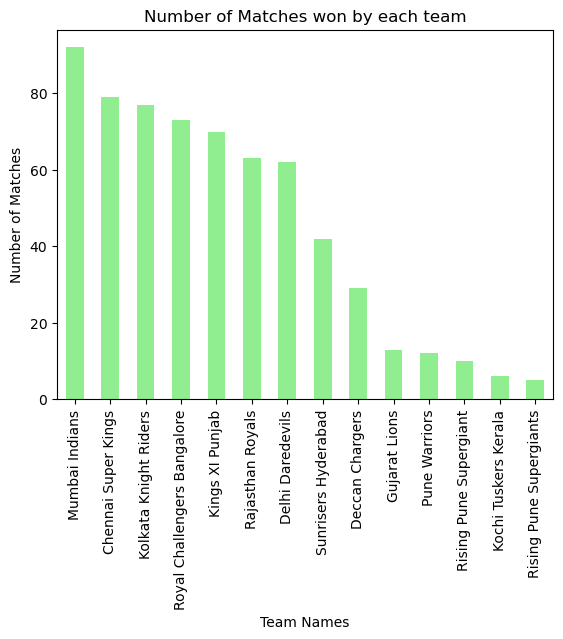

In [17]:
# plotting a Bar Graph for better visualisation
matches['winner'].value_counts().plot(kind='bar', color='lightgreen')
plt.title("Number of Matches won by each team")
plt.xlabel('Team Names')
plt.ylabel('Number of Matches')

4. Toss Decisions percentages

<Axes: ylabel='toss_decision'>

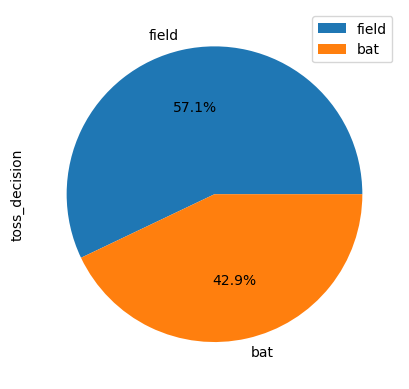

In [18]:
# choosing Pie Chart
matches['toss_decision'].value_counts().plot(kind='pie', legend=True, autopct='%0.1f%%')

5. Analyse the Number of Runs by which matches were won

Text(0, 0.5, 'Count')

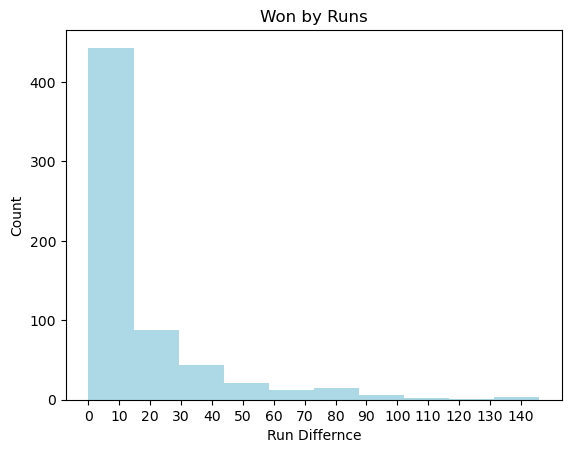

In [19]:
matches['win_by_runs'].plot(
    kind='hist', 
    title = 'Won by Runs',
    color='lightblue', 
    xticks=[10*i for i in range(0, 15)]
    )
plt.xlabel("Run Differnce")
plt.ylabel('Count')

We can infer that majority of the matches are won by a margin of 0-15 runs. Very rarely is the differnce between the score more than 50.

6. Best team overall based on the Number of Matches won

In [20]:
# add two series based on indexes 
best_teams = (matches['team1'].value_counts() + matches['team2'].value_counts()).sort_values(ascending=False).reset_index()
best_teams.rename(columns={'index': 'Team Name', 0: "Matches Won"}, inplace=True)
best_teams

,Team Name,Matches Won
0,Mumbai Indians,157
1,Royal Challengers Bangalore,152
2,Kings XI Punjab,148
3,Kolkata Knight Riders,148
4,Delhi Daredevils,147
5,Chennai Super Kings,131
6,Rajasthan Royals,118
7,Sunrisers Hyderabad,76
8,Deccan Chargers,75
9,Pune Warriors,46


7. List the Season winners by the Year

In [21]:
# sort by season and winner and keep the last occurence
# since the team which won the last match is the season winner
season_winners = matches.drop_duplicates('season', keep='last')[['season', 'winner']].sort_values('season').reset_index()
season_winners[['season', 'winner']]

,season,winner
0,2008,Rajasthan Royals
1,2009,Deccan Chargers
2,2010,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


8. Top 5 Batsmen over the Seasons

In [22]:
# top 5 batsman over all the seasons
batsman_runs = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).reset_index()
batsman_runs.head()

,batsman,batsman_runs
0,SK Raina,4548
1,V Kohli,4423
2,RG Sharma,4207
3,G Gambhir,4132
4,DA Warner,4014


In [23]:
df = pd.merge(matches, deliveries, left_on='id', right_on='match_id')
batsman_season_runs = df.groupby(['season', 'batsman'])['batsman_runs'].sum().reset_index()
batsman_season_runs.sort_values(by=['season', 'batsman_runs'], ascending=[True, False], inplace=True)

# creating a function
def top_5_season(year):
    return batsman_season_runs[batsman_season_runs['season'] == year].head()

# top 5 batsmen of the year 2017
top_5_season(2008)

,season,batsman,batsman_runs
115,2008,SE Marsh,616
39,2008,G Gambhir,534
126,2008,ST Jayasuriya,514
124,2008,SR Watson,472
40,2008,GC Smith,441


9. Find Batsman with the most Number of 4's

In [24]:
# create a mask for all the 4's
mask = deliveries['batsman_runs'] == 4
deliveries[mask].groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).head(1)

batsman
G Gambhir    484
Name: batsman_runs, dtype: int64

10. Find the BAtsman with the Highest Number of 6's

In [25]:
mask = deliveries['batsman_runs'] == 6
deliveries[mask].groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).head(1)

batsman
CH Gayle    266
Name: batsman_runs, dtype: int64

11. Find the Top3 Scores by any Batsman

In [26]:
# create a function
def top_3(name):
    mask = deliveries['batsman'] == name
    name_deliveries = deliveries[mask]
    return name_deliveries.groupby('bowling_team')['batsman_runs'].sum().sort_values(ascending=False).head(3)

# top 3 scores of V Kholi against teams
top_3('V Kohli')

bowling_team
Chennai Super Kings    706
Delhi Daredevils       661
Kings XI Punjab        483
Name: batsman_runs, dtype: int64

12. Find the most Destructive Batsman in Death Overs

Criteria:
>- StrikeRate = (Number of Runs/Number of Balls)*100
>- A Minimum of 200 Balls should be played in the overs 16-20 by the player

In [27]:
# Finding Eligible batsman who match the criteria
death_overs = deliveries[deliveries['over'] > 15]
# count the number of balls played
over_200 = death_overs.groupby('batsman')['batsman_runs'].count()
eligible = over_200[over_200 > 200]
# create a list of batsman who are eligible
names = eligible.index.to_list()
names

['A Mishra',
 'AB de Villiers',
 'AD Mathews',
 'AM Rahane',
 'AR Patel',
 'AT Rayudu',
 'BJ Hodge',
 'DA Miller',
 'DA Warner',
 'DJ Bravo',
 'DJ Hussey',
 'DPMD Jayawardene',
 'Harbhajan Singh',
 'IK Pathan',
 'JA Morkel',
 'JH Kallis',
 'JP Duminy',
 'JP Faulkner',
 'KA Pollard',
 'KD Karthik',
 'KM Jadhav',
 'LRPL Taylor',
 'MK Pandey',
 'MK Tiwary',
 'MS Dhoni',
 'NV Ojha',
 'P Kumar',
 'PP Chawla',
 'R Vinay Kumar',
 'RA Jadeja',
 'RG Sharma',
 'RV Uthappa',
 'S Badrinath',
 'S Dhawan',
 'SK Raina',
 'SPD Smith',
 'SS Tiwary',
 'STR Binny',
 'V Kohli',
 'WP Saha',
 'Y Venugopal Rao',
 'YK Pathan',
 'Yuvraj Singh']

In [28]:
# mask out all the non-eligible batsmen
mask = deliveries['batsman'].isin(names)
final = deliveries[mask]

# generate series for runs scored and balls played
runs = final.groupby('batsman')['batsman_runs'].sum()
balls = final.groupby('batsman')['batsman_runs'].count()

(runs/ balls *100).sort_values(ascending=False)

batsman
AB de Villiers      145.129059
YK Pathan           140.751445
KA Pollard          140.621266
DA Warner           138.318401
DA Miller           137.709251
JA Morkel           136.938202
Harbhajan Singh     135.194585
SK Raina            134.995548
MS Dhoni            132.835821
KM Jadhav           130.555556
JP Faulkner         129.802956
SPD Smith           128.507127
RG Sharma           128.497251
WP Saha             127.727646
RV Uthappa          127.635135
V Kohli             126.588437
Yuvraj Singh        126.390244
STR Binny           123.747981
AT Rayudu           123.014257
KD Karthik          123.008475
AR Patel            122.672065
DJ Bravo            122.286822
JP Duminy           121.970624
BJ Hodge            121.422376
AD Mathews          120.868114
DJ Hussey           120.072661
LRPL Taylor         120.070838
RA Jadeja           118.792867
DPMD Jayawardene    118.791064
S Dhawan            118.502496
AM Rahane           117.486549
MK Pandey           116.938453


Hence, the Most Destructive Player in IPL (by strike rate) is AB de Villers

13. Find the Orange Cap Holder foe each Season

Orange Cap Holder is the Highest Run Scorer of the Season

In [29]:
# we have a combined DataFrame called 'df'
# group it by year and batsman, sort based on year
# drop all the duplicates
df.groupby(['season', 'batsman'])['batsman_runs'].sum().sort_values(ascending=False).reset_index().drop_duplicates('season')

,season,batsman,batsman_runs
0,2016,V Kohli,973
2,2013,MEK Hussey,733
3,2012,CH Gayle,733
6,2014,RV Uthappa,660
7,2017,DA Warner,641
9,2010,SR Tendulkar,618
10,2008,SE Marsh,616
11,2011,CH Gayle,608
14,2009,ML Hayden,572
17,2015,DA Warner,562


14. Analyse the sixes by every team

In [30]:
sixes = deliveries[deliveries['batsman_runs'] == 6]
pivot = sixes.pivot_table(index='over', columns='batting_team', values='batsman_runs', aggfunc='count')

<Axes: xlabel='batting_team', ylabel='over'>

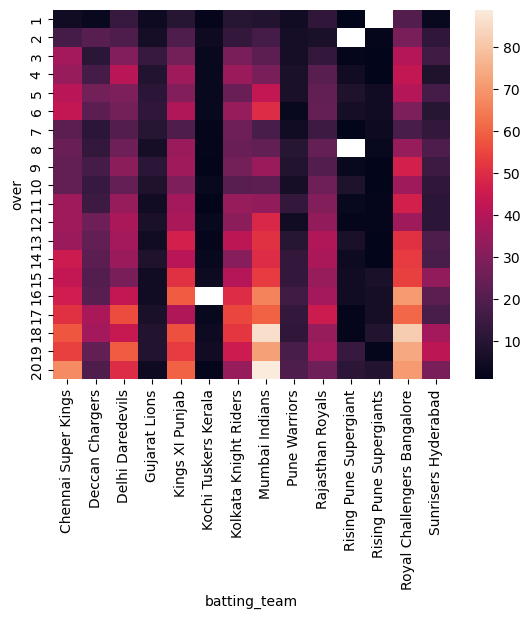

In [31]:
sns.heatmap(pivot)

Note that most of the teams hit more 6's in the death-overs, more than the number of sixes in regular overs.